# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
7. Which giftors provide the most money, in total?

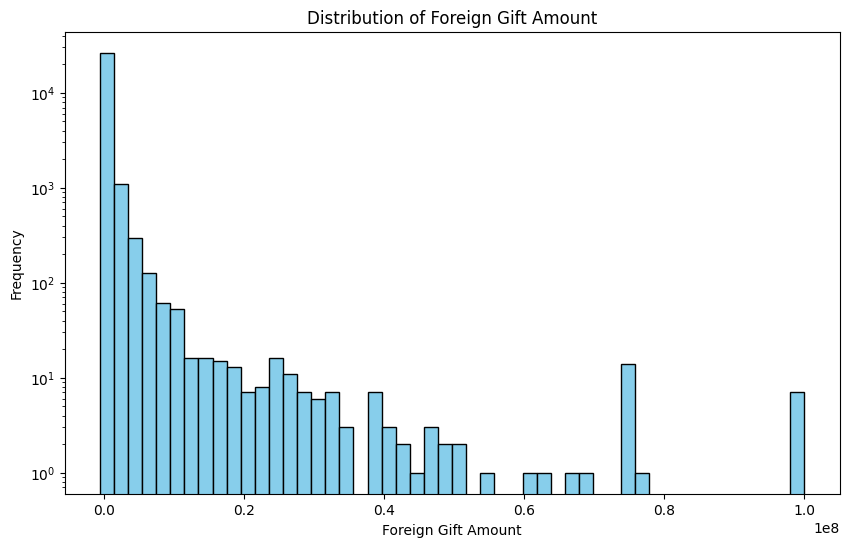


Descriptive Statistics for Foreign Gift Amount:
count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Foreign Gift Amount, dtype: float64

Findings:
- The distribution of foreign gift amounts is heavily skewed to the right.
- Most gifts are relatively small, but there are a few very large gifts.
- The logarithmic scale is used to visualize the distribution better due to the skewness.

Gift Type Value Counts:
Gift Type
Contract         17274
Monetary Gift    10936
Real Estate         11
Name: count, dtype: int64

Gift Type Proportions:
Gift Type
Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390
Name: proportion, dtype: float64


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


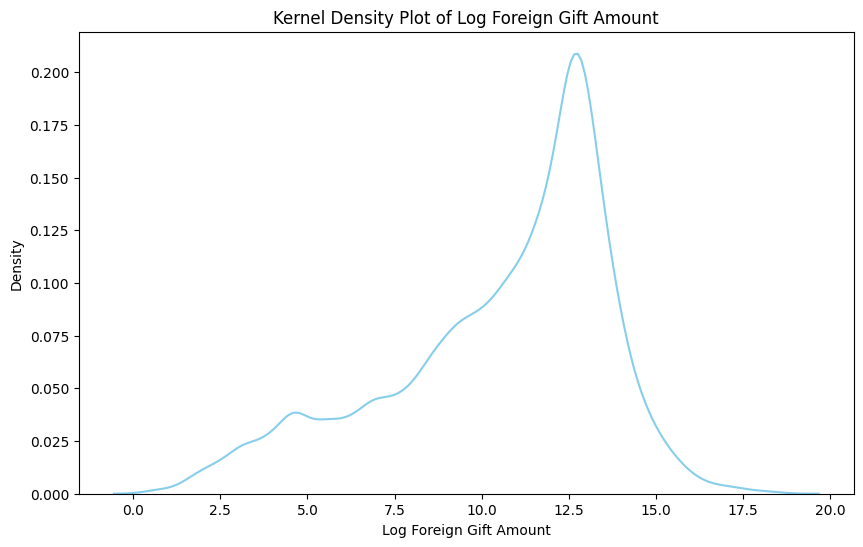

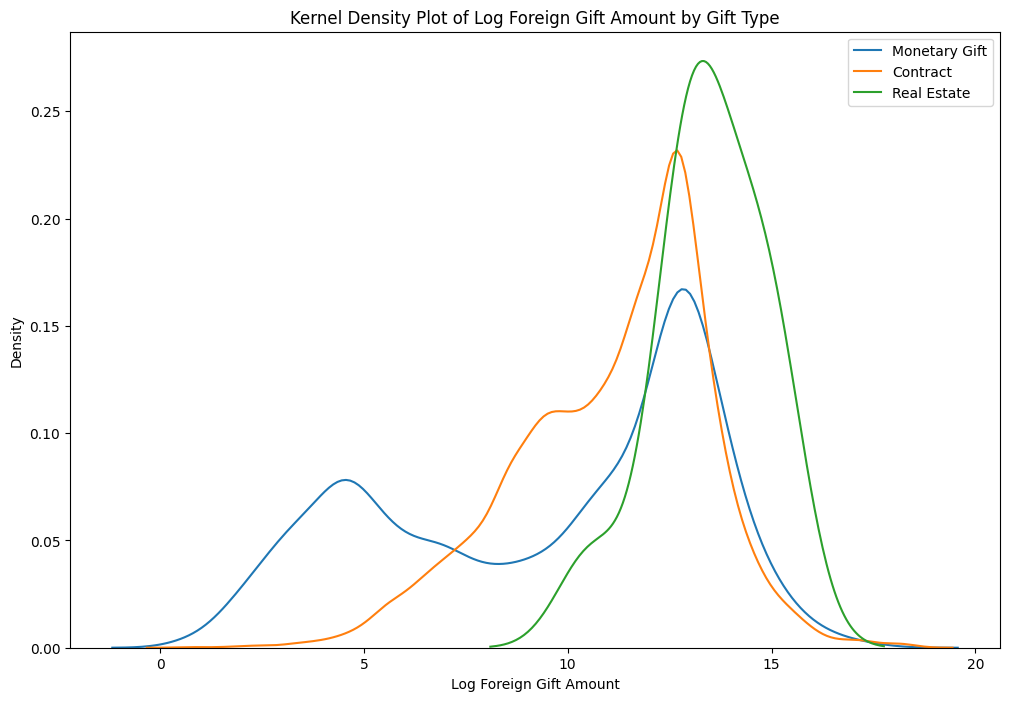


Patterns Noticed:
- The log transformation helps to normalize the distribution and make patterns more visible.
- The overall log distribution shows two peaks, one around log(amount)=4-5 and a larger one around log(amount) = 12-13, suggesting two common ranges for gift amounts.
- The 'Monetary Gift' type has a broad, relatively flat distribution across the log gift amount scale, indicating that monetary gifts occur across a wide range of values, with a smaller peak.
- The 'Contract' type exhibits two distinct peaks. One peak is lower log gift amounts, while the other is higher than that of the 'Monetary Gift' type, suggesting that contracts are often issued for either smaller or very large sums.
- The 'Real Estate' gift type is more concentrated on higher log values, as expected, suggesting that this gift type tends to be associated with larger values, although it's based on very few data points.

Top 15 Countries by Number of Gifts:
Country of Giftor
ENGLAND            3655
CHINA     

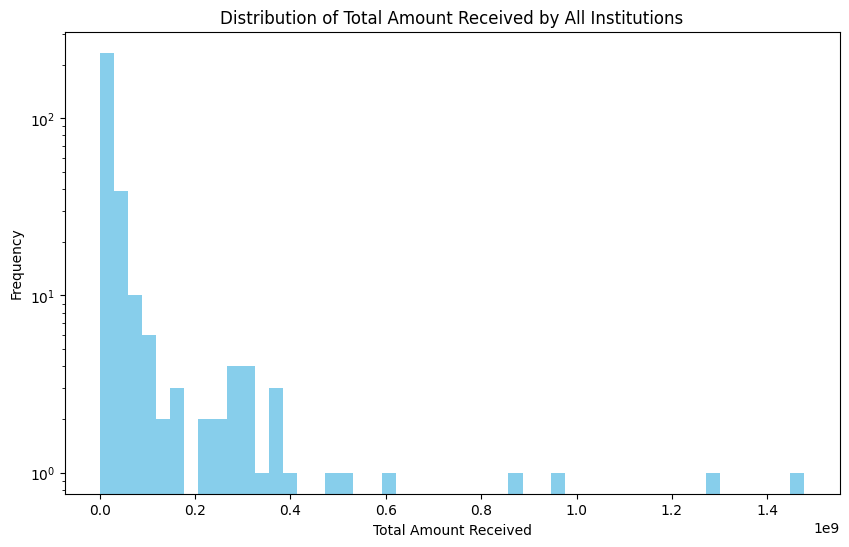


Top Giftors Providing the Most Money:
Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load the dataset
df = pd.read_csv('ForeignGifts_edu.csv')

# data cleaning (converting foreign giftamount to numeric and handling errors)
df['Foreign Gift Amount'] = pd.to_numeric(df['Foreign Gift Amount'], errors='coerce')
df['Foreign Gift Received Date'] = pd.to_datetime(df['Foreign Gift Received Date'], unit='D', origin='1899-12-30', errors='coerce')
# remove rows with NaN in foreign gift amount
df = df.dropna(subset=['Foreign Gift Amount'])

# Foreign Gift Amount Histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Foreign Gift Amount'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Foreign Gift Amount')
plt.xlabel('Foreign Gift Amount')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

print("\nDescriptive Statistics for Foreign Gift Amount:")
print(df['Foreign Gift Amount'].describe())

# findings
print("\nFindings:")
print("- The distribution of foreign gift amounts is heavily skewed to the right.")
print("- Most gifts are relatively small, but there are a few very large gifts.")
print("- The logarithmic scale is used to visualize the distribution better due to the skewness.")


# Gift type value table
gift_type_counts = df['Gift Type'].value_counts()
print("\nGift Type Value Counts:")
print(gift_type_counts)

# proportions
gift_type_proportions = df['Gift Type'].value_counts(normalize=True)
print("\nGift Type Proportions:")
print(gift_type_proportions)


# kernel density plots of the log of foreign gidft amount
df['Log Foreign Gift Amount'] = np.log1p(df['Foreign Gift Amount'])

plt.figure(figsize=(10, 6))
sns.kdeplot(df['Log Foreign Gift Amount'], color='skyblue')
plt.title('Kernel Density Plot of Log Foreign Gift Amount')
plt.xlabel('Log Foreign Gift Amount')
plt.ylabel('Density')
plt.show()

# kernel density plots confitional on gift type
plt.figure(figsize=(12, 8))
for gift_type in df['Gift Type'].unique():
    subset = df[df['Gift Type'] == gift_type]
    sns.kdeplot(subset['Log Foreign Gift Amount'], label=gift_type)
plt.title('Kernel Density Plot of Log Foreign Gift Amount by Gift Type')
plt.xlabel('Log Foreign Gift Amount')
plt.ylabel('Density')
plt.legend()
plt.show()

# patterns
print("\nPatterns Noticed:")
print("- The log transformation helps to normalize the distribution and make patterns more visible.")
print("- The overall log distribution shows two peaks, one around log(amount)=4-5 and a larger one around log(amount) = 12-13, suggesting two common ranges for gift amounts.")
print("- The 'Monetary Gift' type has a broad, relatively flat distribution across the log gift amount scale, indicating that monetary gifts occur across a wide range of values, with a smaller peak.")
print("- The 'Contract' type exhibits two distinct peaks. One peak is lower log gift amounts, while the other is higher than that of the 'Monetary Gift' type, suggesting that contracts are often issued for either smaller or very large sums.")
print("- The 'Real Estate' gift type is more concentrated on higher log values, as expected, suggesting that this gift type tends to be associated with larger values, although it's based on very few data points.")

# top 15 countries by number of gifts
top_15_countries_by_count = df['Country of Giftor'].value_counts().nlargest(15)
print("\nTop 15 Countries by Number of Gifts:")
print(top_15_countries_by_count)

# top 15 institutions by total amount received
top_15_institutions = df.groupby('Institution Name')['Foreign Gift Amount'].sum().nlargest(15)
print("\nTop 15 Institutions by Total Amount Received:")
print(top_15_institutions)

# histogram of the total amount received by all institutions
institution_amounts = df.groupby('Institution Name')['Foreign Gift Amount'].sum()
plt.figure(figsize=(10, 6))
plt.hist(institution_amounts, bins=50, color = 'skyblue')
plt.title('Distribution of Total Amount Received by All Institutions')
plt.xlabel('Total Amount Received')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()


# Giftors providing the most money in total
top_giftors = df.groupby('Giftor Name')['Foreign Gift Amount'].sum().nlargest(15)
print("\nTop Giftors Providing the Most Money:")
print(top_giftors)


**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

Shape of the DataFrame: (623, 10)

Data Types of Each Column:
 Month                                                                                          object
Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)                    int64
Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)                   int64
Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)                                     object
Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                                   object
Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)     object
Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)    object
Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)       object
Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                      int64
Active Well Service

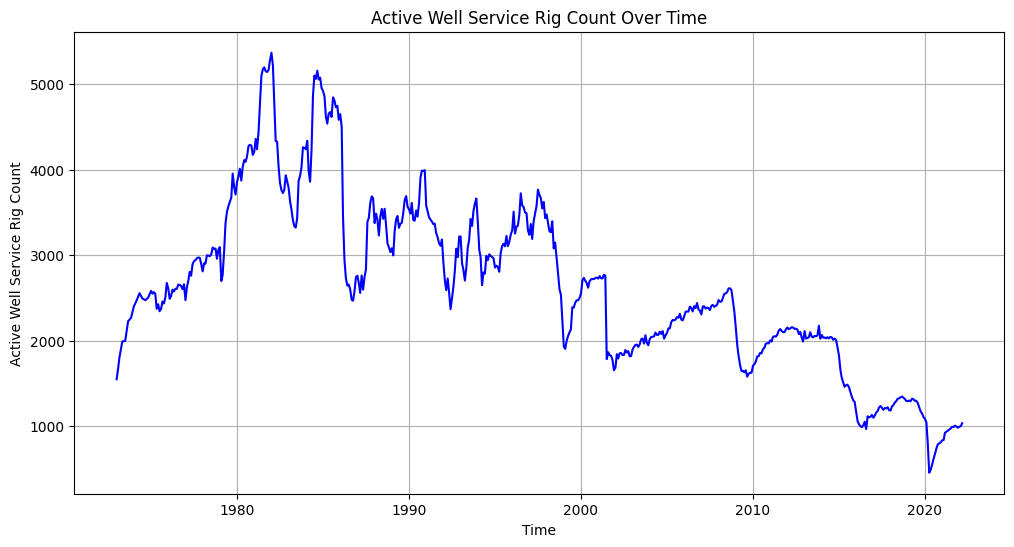


Observations from Active Well Service Rig Count Plot:
- There is significant cyclicality and volatility in rig counts over time.
- There's a general upward trend until the early 1980s, followed by a sharp decline.
- The number of rigs appears to have stabilized at a lower level in recent years, with dramatic decline in 2020
- Spikes and dips likely correspond to economic events and changes in oil prices.


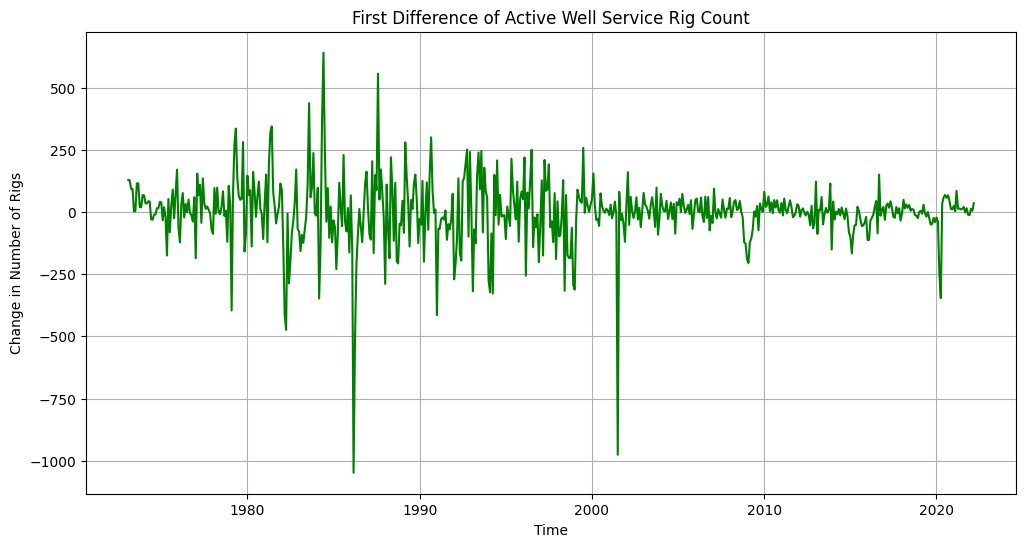


Observations from First Difference Plot:
- The first difference plot shows the *change* in rig counts, highlighting periods of rapid increase or decrease.
- Large positive values indicate a rapid increase in rig counts, while large negative values indicate a rapid decrease.
- The volatility is very pronounced, indicating that changes in rig activity can be quite abrupt.


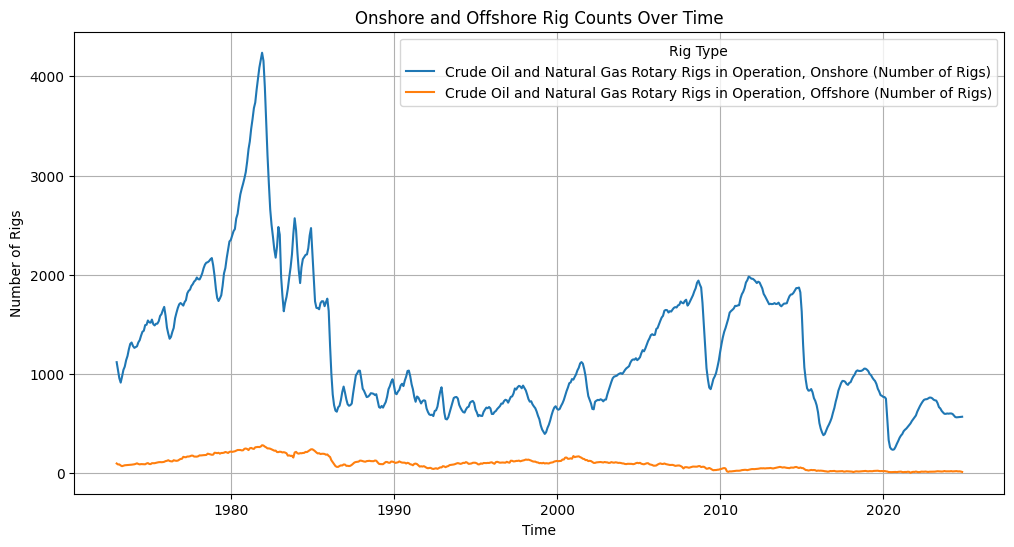


Observations from Onshore and Offshore Rigs Plot:
- Onshore rig counts are significantly higher than offshore rig counts.
- Both onshore and offshore rig counts show similar trends over time.
- Offshore drilling is less responsive to short-term fluctuations than onshore drilling, likely because offshore projects are larger and have longer planning horizons.


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load the dataset
df = pd.read_csv('drilling_rigs.csv')

print("Shape of the DataFrame:", df.shape)
print("\nData Types of Each Column:\n", df.dtypes)
print("\nFirst 5 Rows:\n", df.head())
print("\nMissing Values:\n", df.isnull().sum())

# info about initial data load
print("\nData Cleaning Observations:")
print("- The dataset has {} observations (rows) and {} variables (columns).".format(df.shape[0], df.shape[1]))
print("- Some numeric columns might not have been read in correctly due to 'Not Available' strings.")
print("- Specifically, columns with 'Not Available' need to be handled.")
print("- The 'Month' column needs to be converted to datetime.")

# data cleaning
df = df.replace('Not Available', pd.NA)
# convert columns to numeric
cols_to_numeric = df.columns.drop('Month')
for col in cols_to_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# convert 'Month' to datetime
df['time'] = pd.to_datetime(df['Month'], format='mixed', errors='coerce')
df = df.set_index('time')

# remove rows wih NaN
df = df.dropna(subset=['Month'])

df = df.drop('Month', axis = 1)

print("\nData Types After Conversion:\n", df.dtypes)
print("\nMissing Values After Conversion:\n", df.isnull().sum())


# line plot
plt.figure(figsize=(12, 6))
plt.plot(df['Active Well Service Rig Count (Number of Rigs)'], color = 'blue')
plt.title('Active Well Service Rig Count Over Time')
plt.xlabel('Time')
plt.ylabel('Active Well Service Rig Count')
plt.grid(True)
plt.show()

# descriptions
print("\nObservations from Active Well Service Rig Count Plot:")
print("- There is significant cyclicality and volatility in rig counts over time.")
print("- There's a general upward trend until the early 1980s, followed by a sharp decline.")
print("- The number of rigs appears to have stabilized at a lower level in recent years, with dramatic decline in 2020")
print("- Spikes and dips likely correspond to economic events and changes in oil prices.")

# First difference
df['Rig Count Diff'] = df['Active Well Service Rig Count (Number of Rigs)'].diff()

# plot
plt.figure(figsize=(12, 6))
plt.plot(df['Rig Count Diff'], color = 'green')
plt.title('First Difference of Active Well Service Rig Count')
plt.xlabel('Time')
plt.ylabel('Change in Number of Rigs')
plt.grid(True)
plt.show()

# Descriptions
print("\nObservations from First Difference Plot:")
print("- The first difference plot shows the *change* in rig counts, highlighting periods of rapid increase or decrease.")
print("- Large positive values indicate a rapid increase in rig counts, while large negative values indicate a rapid decrease.")
print("- The volatility is very pronounced, indicating that changes in rig activity can be quite abrupt.")

# MELTINGS onshore and offshore rigs
df_melted = pd.melt(df.reset_index(), id_vars=['time'],value_vars=['Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)','Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'],var_name='Rig Type', value_name='Number of Rigs')

# plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='time', y='Number of Rigs', hue='Rig Type', data=df_melted)
plt.title('Onshore and Offshore Rig Counts Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Rigs')
plt.grid(True)
plt.show()

# Descriptions
print("\nObservations from Onshore and Offshore Rigs Plot:")
print("- Onshore rig counts are significantly higher than offshore rig counts.")
print("- Both onshore and offshore rig counts show similar trends over time.")
print("- Offshore drilling is less responsive to short-term fluctuations than onshore drilling, likely because offshore projects are larger and have longer planning horizons.")